(random-vectors)=
# Random vectors

Essentially, an $n$-dimensional _random vector_ is an $n$-tuple of random variables. These are the objects of study in the present chapter. We will discuss higher-dimensional generalizations of many of the gadgets that we studied in the context of random variables back in {numref}`Chapter %s <random-variables>`, including probability measures induced by random vectors, known as _joint distributions_. These latter distributions will be used to generalize to random variables the notions of _conditional probability_ and _independence_ that we first studied back in {numref}`Chapter %s <rules-prob>`, which are some of the most important concepts in all probability theory. A careful study of this chapter is absolutely _critical_ for the rest of the book!




(motivation)=
## Motivation

To introduce _random vectors_, let's return to the housing dataset that we studied a [previous programming assignment](https://github.com/jmyers7/stats-book-materials/blob/main/programming-assignments/assignment_04.ipynb), which contains data on $2{,}930$ houses in Ames, Iowa. We are interested in two particular features in the dataset, _area_ and _selling price_:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('../aux-files/custom_style_light.mplstyle')
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

url = 'https://raw.githubusercontent.com/jmyers7/stats-book-materials/main/data/data-3-1.csv'
df = pd.read_csv(url, usecols=['area', 'price'])
df.describe()

area        price
count  2930.000000  2930.000000
mean   1499.690444   180.796060
std     505.508887    79.886692
min     334.000000    12.789000
25%    1126.000000   129.500000
50%    1442.000000   160.000000
75%    1742.750000   213.500000
max    5642.000000   755.000000

The areas are measured in square feet, while the prices are measured in thousands of US dollars. We label the area observations as $x$'s and the price observations as $y$'s, so that our dataset consists of two lists of $m=2{,}930$ numbers:

$$
x_1,x_2,\ldots,x_m \quad \text{and} \quad y_1,y_2,\ldots,y_m.
$$

We conceptualize these as observed values corresponding to two random variables $X$ and $Y$.

We may plot histograms (and KDEs) for the empirical distributions of the datasets:

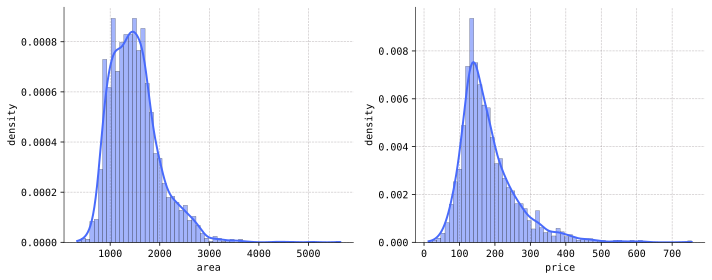

In [2]:
_, axes = plt.subplots(ncols=2, figsize=(10, 4))
sns.histplot(data=df, x='area', ax=axes[0], ec='black', stat='density', kde=True)
axes[0].set_ylabel('density')
sns.histplot(data=df, x='price', ax=axes[1], ec='black', stat='density', kde=True)
axes[1].set_ylabel('density')
plt.tight_layout()

Whatever information we might glean from these histograms, the information is about the two random variables $X$ and $Y$ _in isolation_ from each other. But because we expect that the size of a house and its selling price might be (strongly) related, it might be more informative to study $X$ and $Y$ _in tandem_ with each other. One way to do this is via the scatter plots that we produced in a [previous programming assignment](https://github.com/jmyers7/stats-book-materials/blob/main/programming-assignments/assignment_04.ipynb):

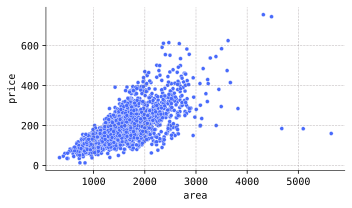

In [3]:
sns.scatterplot(data=df, x='area', y='price')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

This plot confirms exactly what we expected! Since the pattern of points generally follows a positively-sloped line, we may conclude that as the size $X$ of a house increases, so too does its selling price $Y$.

To reiterate:

> We would not have been able to discover this relation between $X$ and $Y$ had we studied these two variables in isolation from each other. This suggests that, given _any_ pair of random variables $X$ and $Y$, we might obtain valuable information if we study them _together_ as a single object.



























## $2$-dimensional random vectors

So, what do you get when you want to combine two random variables into a single object? Here's the answer:

```{prf:definition}
:label: two-dim-vector-def

Let $S$ be a probability space. A _$2$-dimensional random vector_ is a function

$$
\mathbf{X} : S \to \mathbb{R}^2.
$$

Thus, we may write $\mathbf{X}(s) = (X_1(s), X_2(s))$ for each sample point $s\in S$, where

$$
X_1:S\to \mathbb{R} \quad \text{and} \quad X_2: S \to \mathbb{R}
$$

are random variables. When we do so, the random variables $X_1$ and $X_2$ are called the _components_ of the random vector $\mathbf{X}$.
```

So, a $2$-dimensional random vector is nothing but a pair of random variables. That's it. We will often write a random vector simply as a pair $(X_1,X_2)$, where $X_1$ and $X_2$ are the component random variables. In the example in the previous section, we have the random vector $(X,Y)$ consisting of the size of a house and its selling price; notice here that $X$ does not stand for the random vector, but rather its first component.

So what's the big deal? Simply putting two random variables together into a random vector doesn't seem like it would lead to anything useful. But do you remember that every random variable $X$ induces a probability distribution $P_X$ on $\mathbb{R}$? (If not, look [here](prob-measure-rv).) As I will now show you, every random vector $(X,Y)$ does the same, inducing a probability measure denoted $P_{XY}$, but this time the measure lives on the plane $\mathbb{R}^2$:


```{image} ../img/pushforward-vec.svg
:width: 70%
:align: center
```
&nbsp;

Here is the official definition. It will be worth comparing this to {prf:ref}`prob-measure-X-defn`.


```{prf:definition}
:label: prob-measure-two-dim-def

Let $(X,Y):S \to \mathbb{R}^2$ be a $2$-dimensional random vector on a probability space $S$ with probability measure $P$. We define the _probability measure_ of $(X,Y)$, denoted $P_{XY}$, via the formula

$$
P_{XY}(C) = P \left( \{s\in S : (X(s),Y(s))\in C\} \right),
$$ (hard-eqn)

for all events $C\subset \mathbb{R}^2$. The probability measure $P_{XY}$ is also called the _joint distribution_ or the _bivariate distribution_ of $X$ and $Y$.
```

For a given event $C\subset \mathbb{R}^2$, notice that the set

$$
\{s\in S : (X(s),Y(s))\in C\} \subset S
$$ (inv-img-eqn)

inside the probability measure on the right-hand side of {eq}`hard-eqn` consists exactly of those sample points $s\in S$ that land in $C$ under the action of the random vector $(X,Y)$; I would visualize this as:

```{image} ../img/pushforward-vec-2.svg
:width: 70%
:align: center
```
&nbsp;

Then, the probability $P_{XY}(C)$ is (by definition!) equal to the probability of the set {eq}`inv-img-eqn` as measured by the original measure $P$.

There is alternate notation for $P_{XY}(C)$ that you'll see, similar to the alternate notation introduced back in {numref}`prob-measure-rv` for $P_X$. Indeed, instead of writing $P_{XY}(C)$, we will often write

$$
P((X,Y)\in C).
$$ (wrong2-eqn)

If $C$ happens to be a product event

$$
C = A \times B = \{(x,y)\in \mathbb{R}^2 : x\in A, y \in B\}
$$

where $A,B\subset \mathbb{R}$, then we will write

$$
P(X\in A, \ Y\in B)
$$ (wrong-eqn)

in place of $P_{XY}(C)$. Notice that the expressions in {eq}`wrong2-eqn` and {eq}`wrong-eqn` are technically abuses of notation.

```{admonition} Problem Prompt
Do problem 1 on the worksheet.
```

Before continuing, it might be worth briefly reviewing the definitions of _discrete_ and _bivariate continuous probability distributions_ (see {numref}`discrete-prob` for the first, and {numref}`bivar-cont-prob` for the second). The first types of distributions were defined in terms of the existence of probability mass functions, while the second were defined in terms of the existence of probability density functions. We use these definitions in:

```{prf:definition}
:label: discrete-cont-two-dim-vec-def

Let $(X,Y)$ be a $2$-dimensional random vector.

* We shall say $(X,Y)$ is _discrete_, or that $X$ and $Y$ are _jointly discrete_, if the joint probability distribution $P_{XY}$ is discrete. In other words, we require that there exists a _joint probability mass function_ $p(x,y)$ such that

    $$
    P((X,Y)\in C) = \sum_{(x,y)\in C} p(x,y)
    $$

    for all events $C \subset \mathbb{R}^2$.

* We shall say $(X,Y)$ is _continuous_, or that $X$ and $Y$ are _jointly continuous_, if the joint probability distribution $P_{XY}$ is continuous. In other words, we require that there exists a _joint probability density function_ $f(x,y)$ such that

    $$
    P\left( (X,Y)\in C \right) = \iint_C f(x,y) \ \text{d}x \text{d}y
    $$
  
    for all events $C\subset \mathbb{R}^2$.
```

So, the component random variables $X$ and $Y$ of a random vector $(X,Y)$ may be discrete or continuous, and the random vector $(X,Y)$ _itself_ may be discrete or continuous. What are the relations between these properties? Answer:

```{prf:theorem}
:label: joint-cont-cont-thm

Let $(X,Y)$ be a $2$-dimensional random vector.

1. The random vector $(X,Y)$ is discrete if and only if both $X$ and $Y$ are discrete.

2. If $(X,Y)$ is continuous, then $X$ and $Y$ are both continuous. However, it does _not_ nececessarily follow that if both $X$ and $Y$ are continuous, then so too is $(X,Y)$.
```

Part of this theorem will be proved below in {prf:ref}`marginal-thm`.

```{margin}
This clever counterexample is borrowed from {cite}`DeGrootSchervish2014`.
```
The reason that individual continuity of $X$ and $Y$ does _not_ imply continuity of $(X,Y)$ can be explained by observing that _if_ $(X,Y)$ were continuous, then the probability that $(X,Y)$ takes values on any given line in $\mathbb{R}^2$ is $0$. Indeed, this is because probabilities of bivariate continuous distributions are volumes under density surfaces, and there is _no_ volume above a line in the plane. But if $X$ is continuous and $X=Y$, then the probability that $(X,Y)$ takes values on the line $x=y$ is exactly $1$. Thus, the random vector $(X,Y)$ cannot be continuous!

```{admonition} Problem Prompt
Do problems 2-4 on the worksheet.
```

## Bivariate distribution functions

We now generalize the cumulative distribution functions from {numref}`dist-func-rv` to $2$-dimensional random vectors.

```{prf:definition}
:label: cdf-vector-def

Let $(X,Y)$ be a $2$-dimensional random vector. The _distribution function_ of $(X,Y)$ is the function $F:\mathbb{R}^2 \to \mathbb{R}$ defined by

$$
F(x,y) = P(X\leq x, Y\leq y).
$$

In particular:

1. If $(X,Y)$ is discrete with probability mass function $p(x,y)$, then

    $$
    F(x,y) = \sum_{x^\star\leq x, \ y^\star \leq y} p(x^\star, y^\star).
    $$

2. If $(X,Y)$ is continuous with probability density function $f(x,y)$, then

    $$
    F(x,y) = \int_{-\infty}^y \int_{-\infty}^x f(x^\star, y^\star) \ \text{d}x^\star \text{d} y^\star.
    $$
```

```{admonition} Problem Prompt
Do problem 5 on the worksheet.
```

## Marginal distributions

I would visualize a $2$-dimensional random vector $(X,Y)$ along with its component random variables $X$ and $Y$ as follows:

```{image} ../img/proj.svg
:width: 80%
:align: center
```
&nbsp;

Here, the two maps labeled "proj" are what we mathematicians call the [_universal projection maps_](https://en.wikipedia.org/wiki/Product_(category_theory)); the first one, on the left, "projects" $\mathbb{R}^2$ onto the $x$-axis, and is given simply by chopping off the $y$-coordinate:

$$
(x,y) \mapsto x.
$$

The second projection, on the right in the diagram, "projects" $\mathbb{R}^2$ onto the $y$-axis by chopping off the $x$-coordinate:

$$
(x,y) \mapsto y.
$$

Notice that the diagram "[commutes](https://en.wikipedia.org/wiki/Commutative_diagram)," in the sense that the action of $X$ coincides with the action of the composite map $\text{proj}\circ (X,Y)$. Thus, if you begin at the sample space $S$ and proceed to $\mathbb{R}$ along $X$, you'll get the same result as first going along $(X,Y)$ to $\mathbb{R}^2$, and then going along the projection arrow to $\mathbb{R}$. The same observations hold for $Y$.

In this situation, we have _four_(!) probability measures in the mix. We have the original measure $P$ on the sample space $S$, the joint measure $P_{XY}$ on the plane $\mathbb{R}^2$, as well as the two measures $P_X$ and $P_Y$ on the line $\mathbb{R}$. My goal is to convince you in this section that these probability measures are all tightly linked to each other.

Let's focus on the link between $P_{XY}$ and $P_X$. Let's suppose that we have an event $A\subset \mathbb{R}$ along with the product event $A \times \mathbb{R} \subset \mathbb{R}^2$. I would visualize this as:

```{image} ../img/proj-2.svg
:width: 100%
:align: center
```
&nbsp;

Notice that the product set $A\times \mathbb{R}$ consists exactly of those ordered pairs $(x,y)$ that land in $A$ under the projection map. Now, consider the two sets

$$
\{s\in S : X(s) \in A\} \quad \text{and} \quad \{s\in S : (X(s), Y(s))\in A \times \mathbb{R} \}
$$

consisting, respectively, of those sample points $s\in S$ that land in $A$ under $X$ and those sample points that land in $A \times \mathbb{R}$ under $(X,Y)$. Take a moment to convince yourself that these are just two different descriptions of the _same set_! Therefore, we may conclude that

$$
P_X(A) = P\big(\{s\in S : X(s) \in A\} \big) = P \big(\{s\in S : (X(s), Y(s))\in A \times \mathbb{R} \} \big) = P_{XY}(A \times \mathbb{R}),
$$

where the first equality follows from _the definition_ of $P_X$ while the last equality follows from _the definition_ of $P_{XY}$. This argument essentially amounts to a proof of the following crucial result:

```{prf:theorem}
:label: marg-thm

Let $(X,Y)$ be a $2$-dimensional random vector with induced probability measure $P_{XY}$. Then the measures $P_X$ and $P_Y$ may be obtained via the formulas

$$
P_X(A) = P_{XY}(A\times \mathbb{R}) \quad \text{and} \quad P_Y(B) = P_{XY}(\mathbb{R} \times B)
$$

for all events $A,B\subset \mathbb{R}$. In particular:

1. If $(X,Y)$ is discrete with probability mass function $p(x,y)$, then

    $$
    P(X\in A) = \sum_{x\in A} \sum_{y\in \mathbb{R}} p(x,y) \quad \text{and} \quad P(Y\in B) = \sum_{y\in B} \sum_{x\in \mathbb{R}} p(x,y).
    $$

2. If $(X,Y)$ is continuous with probability density function $f(x,y)$, then

    $$
    P(X\in A) = \int_A \int_{-\infty}^\infty f(x,y) \ \text{d}y \text{d}x
    $$
  
    and

    $$
    P(Y\in B) = \int_B \int_{-\infty}^\infty f(x,y) \ \text{d}x \text{d}y.
    $$
```

In this scenario, the distributions $P_X$ and $P_Y$ have special names:


```{prf:definition}
:label: marginal-def

Let $(X,Y)$ be a $2$-dimensional random vector. Then the distributions $P_X$ and $P_Y$ are called the _marginal distributions_ of $(X,Y)$.
```

So, just to emphasize:

> Marginal distributions are nothing new---the only thing that is new is the terminology.

An immediate consequence of {prf:ref}`marg-thm` is a description of the marginal probability mass and density functions. We will use this result often:

```{prf:theorem}
:label: marginal-thm

Let $(X,Y)$ be a $2$-dimensional random vector.

1. If $(X,Y)$ is discrete with probability mass function $p(x,y)$, then both $X$ and $Y$ are discrete with probability mass functions given by

    $$
    p_X(x) = \sum_{y\in \mathbb{R}} p(x,y) \quad \text{and} \quad p_Y(y) = \sum_{x\in \mathbb{R}}p(x,y).
    $$
  
2. If $(X,Y)$ is continuous with probability density function $f(x,y)$, then both $X$ and $Y$ are continuous with probability density functions given by 

    $$
    f_X(x) = \int_{-\infty}^\infty f(x,y) \ \text{d}y \quad \text{and} \quad f_Y(y) = \int_{-\infty}^\infty f(x,y) \ \text{d} x.
    $$ (marg-cont-eqn)

```

Here's how I remember these formulas:

```{tip}
1. To obtain the marginal mass $p_X(x)$ from the joint mass $p(x,y)$, we "sum out" the dependence of $p(x,y)$ on $y$. Likewise for obtaining $p_Y(y)$ from $p(x,y)$.

2. To obtain the marginal density $f_X(x)$ from the joint density $f(x,y)$, we "integrate out" the dependence of $f(x,y)$ on $y$. Likewise for obtaining $f_Y(y)$ from $f(x,y)$.
```

In the continuous case, you should visualize the formulas {eq}`marg-cont-eqn` as integrations over cross-sections of the density surfaces. For example, the following picture is a visualization of the formula for the marginal density function $f_Y(y)$ evaluated at $y=5$:

```{image} ../img/margDensity.svg
:width: 70%
:align: center
```
&nbsp;

In the picture, we imagine slicing the graph of the density $f(x,y)$ with the vertical plane $y=5$. (We must imagine this plane extends off infinitely far in each direction.) Where the plane and the density surface intersect, a curve will be traced out on the plane. The area beneath _this_ cross-sectional curve is exactly the value

$$
f_Y(5) = \int_{-\infty}^\infty f(x,5) \ \text{d}x.
$$

This is the visualization for continuous distributions---what might the analogous visualization look like for discrete distributions? Can you sketch the figure on your own?

```{admonition} Problem Prompt
Do problems 6 and 7 on the worksheet.
```


















## Bivariate empirical distributions

Almost everything that we learned in the [previous chapter](theory-to-practice) on data and empirical distributions may be applied in the bivariate setting. Essentially, you just need to change all random variables to random vectors, and put either a "joint" or "bivariate" in front of everything. :)

To illustrate, let's return to the Ames housing data explored in the [first section](motivation). There, we had _two_ observed random samples

$$
x_1,x_2,\ldots,x_m \quad \text{and} \quad y_1,y_2,\ldots,y_m
$$

of the sizes and the selling prices of $m=2{,}930$ houses. In the precise language of the [previous chapter](theory-to-practice), we would say that these datasets are observations from the IID random samples

$$
X_1,X_2,\ldots,X_m \quad \text{and} \quad Y_1,Y_2,\ldots,Y_m.
$$

Make sure you remember the difference between a random sample and an _observed_ random sample!

However, the $i$-th size $x_i$ and the $i$-th price $y_i$ naturally go together, since they are both referring to the $i$-th house. Therefore, we might instead consider our two observed random samples as a _single_ observed random sample

$$
(x_1,y_1), (x_2,y_2),\ldots,(x_m,y_m).
$$

But what is this new observed random sample an observation of? Answer:

```{prf:definition}
:label: random-sample-vec-defn

Let $(X_1,Y_1), (X_2,Y_2),\ldots,(X_m,Y_m)$ be a sequence of $2$-dimensional random vectors, all defined on the same probability space.

* The random vectors are called a _bivariate random sample_ if they are _independent_ and _identically distributed_ (IID).

Provided that the sequence is a bivariate random sample, an _observed bivariate random sample_, or a _bivariate dataset_, is a sequence of pairs of real numbers

$$
(x_1,y_1), (x_2,y_2),\ldots,(x_m,y_m)
$$

where $(x_i,y_i)$ is an observation of $(X_i,Y_i)$.
```

To say that $(x_i,y_i)$ is an observed value of the random vector $(X_i,Y_i)$ simply means that it is in the range of the random vector (as a function with codomain $\mathbb{R}^2$). As I remarked in the [previous chapter](theory-to-practice), we haven't officially defined _independence_ yet---that will come in {prf:ref}`independence-defn` below.

Thus, it might be more natural to say that our housing data constitutes an observed bivariate random sample, rather than just two individual observed univariate random samples. These types of random samples---along with their higher-dimensional cousins called _multivariate random samples_---are quite common in prediction tasks where we aim to predict the $y_i$'s based on the $x_i$'s. For example, this is the entire gist of _supervised machine learning_.

Adapting the definition of empirical distributions of univariate datasets from the [previous chapter](theory-to-practice) is also easy:

```{prf:definition}
:label: empirical-bivar-def

Let $(x_1,y_1),(x_2,y_2),\ldots,(x_m,y_m)$ be an observed bivariate random sample, i.e., a bivariate dataset. The _empirical distribution_ of the dataset is the discrete probability measure on $\mathbb{R}^2$ with joint probability mass function

$$
p(x,y) = \frac{\text{frequency of $(x,y)$ in the dataset}}{m}.
$$
```

We saw in the [first section](motivation) that we may visualize bivariate empirical distributions using scatter plots. Here's a variation on a scatter plot, which places the marginal empirical distributions in the (where else?) margins of the plot!

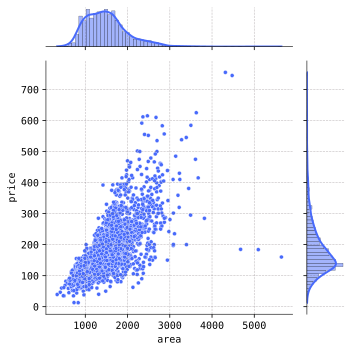

In [4]:
sns.jointplot(data=df, x='area', y='price', marginal_kws={'kde' : True, 'ec': 'black'})
plt.gcf().set_size_inches(w=5, h=5)
plt.tight_layout()

Along the top of the figure we see a histogram (with KDE) of the empirical distribution of the $x_i$'s, and along the side we see a histogram (with KDE) of the empirical distribution of the $y_i$'s.

This type of figure makes it very clear how marginal distributions are obtained from joint distributions. For example, take a look at:

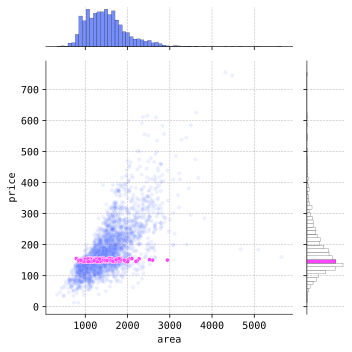

In [5]:
df_slice = df[(145 <= df['price']) & (df['price'] <= 155)]

g = sns.JointGrid()
sns.scatterplot(data=df, x='area', y='price', ax=g.ax_joint, alpha=0.1)
sns.scatterplot(data=df_slice, x='area', y='price', ax=g.ax_joint)
ax1 = sns.histplot(data=df, x='area', ax=g.ax_marg_x, ec='black')
ax2 = sns.histplot(data=df, y='price', ax=g.ax_marg_y, ec='black')

for bar in ax2.patches:
    bar.set_facecolor('w')
ax2.patches[11].set_facecolor('#FD46FC')

plt.gcf().set_size_inches(4, 4)
g.set_axis_labels(xlabel='area', ylabel='price')
plt.gcf().set_size_inches(w=5, h=5)
plt.tight_layout()

```{margin}
Actually, we need to be careful with identifying $p_Y(150)$ as the _exact_ height of the histogram bar, since this is a "binned" histogram.
```

The height of the highlighted histogram bar on the right is the value $p_Y(150)$, where $p_Y$ is the empirical marginal mass function of the price variable $Y$. Remember, this value is obtained through the formula

$$
p_Y(150) = \sum_{x\in \mathbb{R}} p_{XY}(x,150),
$$

where $p_{XY}$ is the empirical joint mass function. We visualize this formula as summing the joint mass function $p_{XY}(x,150)$ along the (highlighted) horizontal slice of the scatter plot where $y=150$.

What about bivariate versions of KDEs and histograms? Answer:

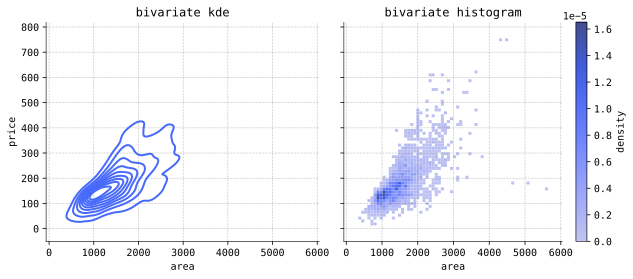

In [6]:
_, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True, sharex=True)

sns.kdeplot(data=df, x='area', y='price', ax=axes[0])
sns.histplot(data=df, x='area', y='price', cbar=True, ax=axes[1], cbar_kws={'label': 'density'}, stat='density')

axes[0].set_title('bivariate kde')
axes[1].set_title('bivariate histogram')
plt.tight_layout()

Even though the density surface for a bivariate empirical distribution is _not_ a continuous surface, if it _were_, you can imagine that the curves in the KDE on the left are its contours. In other words, these are the curves over which the density surface has constant height. It appears that the density surface has either a global minimum or global maximum near $(1000,125)$, but we can't tell which from the KDE alone because the contours are not labeled.

On the right-hand side of the figure above, we have a bivariate version of a histogram. While a histogram for a univariate dataset is obtained by subdividing the line $\mathbb{R}$ into bins, for a bivariate dataset the plane $\mathbb{R}^2$ is subdivided into rectangular bins. Then, over each of these rectangular bins we would place a $3$-dimensional "bar" whose height is equal (or proportional) to the number of data points that fall in the bin; thus, a histogram for bivariate data should really live in three dimensions. However, the histogram above shows only the bins in the plane $\mathbb{R}^2$, and it displays the heights of the "bars" by color, with darker shades of blue indicating a larger number of data points are contained in the bin. It is evident from this diagram that the global extreme point identified in the KDE is, in fact, a global maximum.
















## Conditional distributions

Given two events $A$ and $B$ in a probability space, we learned [previously](cond-prob) that the _conditional probability of $A$ given $B$_ is defined via the formula

$$
P(A|B) = \frac{P(A\cap B)}{P(B)},
$$

provided that $P(B) \neq 0$. The probability on the left is the probability that $A$ occurs, _given_ that you already know the event $B$ has occurred. One may view $P(-|B)$ (the "$-$" means "blank") as a probability measure with sample space $B$ and where all events are of the form $A\cap B$. It is worth repeating this, in slightly simpler language:

> Passing from plain probabilities to conditional probabilities has the effect of shrinking the sample space to the event that you are "conditioning on."

Let's see how this might work with the probability measures induced by random variables.

To get a feel for what we're going for, let's return to our housing data

$$
(x_1,y_1),(x_2,y_2),\ldots,(x_m,y_m)
$$

and its bivariate empirical distribution that we studied in the previous section. Suppose that we are interested in studying the (empirical) distribution of sizes $x$ of houses with fixed sale price $y=150$. If we set $B = \{150\}$, then this means we want to shrink the range of the $y$'s down from all of $\mathbb{R}$ to the simple event $B$. The slice of data points with $y=150$ are highlighted in the following scatter plot:

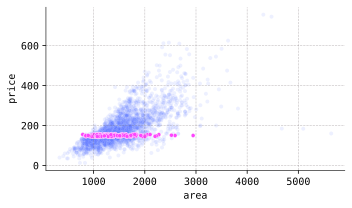

In [7]:
sns.scatterplot(data=df, x='area', y='price', alpha=0.1)
sns.scatterplot(data=df_slice, x='area', y='price')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

Then, after cutting down the range of $y$'s to lie in $B=\{150\}$, we wonder what the distribution over the sizes $x$ looks like. Answer:

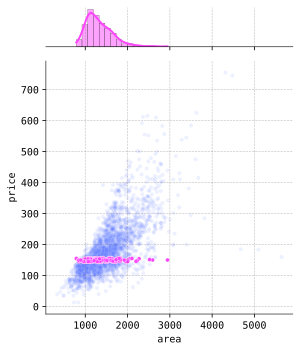

In [8]:

g = sns.JointGrid()
scatter = sns.scatterplot(data=df, x='area', y='price', ax=g.ax_joint, alpha=0.1)
sns.scatterplot(data=df_slice, x='area', y='price', ax=g.ax_joint)
sns.histplot(data=df_slice, x='area', ax=g.ax_marg_x, ec='black', color='#FD46FC', kde=True)

g.ax_marg_y.remove()
g.set_axis_labels(xlabel='area', ylabel='price')
plt.gcf().set_size_inches(w=5, h=5)
plt.tight_layout()

```{margin}
If you haven't caught on by now, the word _empirical_ usually always means "observed" or "based on a dataset."

```
The histogram along the top of the figure shows the empirical distribution of the $x$'s belonging to data points $(x,y)$ with $y=150$. If we remember that our original random variables in the [first section](motivation) were $X$ and $Y$, then this empirical distribution is an approximation to the _conditional distribution of $X$ given $Y=150$._ (The precise definition is below.) So, the histogram along the top of the scatter plot displays an _empirical_ conditional distribution.


```{margin}
At the most general level, defining _conditional distributions_ is surprisingly very difficult. Have a look at [this](https://en.wikipedia.org/wiki/Conditional_probability_distribution#Measure-theoretic_formulation) page if you don't believe me.
```

Alright. We're ready for the definitions. At this level, it turns out that the easiest way to define conditional distributions is via mass and density functions:

```{prf:definition}
:label: conditional-prob-functions-def

Let $X$ and $Y$ be random variables.

* Suppose $(X,Y)$ is discrete, so that both $X$ and $Y$ are discrete as well. The _conditional probability mass function of $X$ given $Y$_ is the function

    $$
    p_{X|Y}(x|y) = \frac{p_{XY}(x,y)}{p_Y(y)},
    $$

    defined for all those $y$ such that $p_Y(y)\neq 0$.

* Suppose $(X,Y)$ is continuous, so that both $X$ and $Y$ are continuous as well. The _conditional probability density function of $X$ given $Y$_ is the function

    $$
    f_{X|Y}(x|y) = \frac{f_{XY}(x,y)}{f_Y(y)},
    $$

    defined for all those $y$ such that $f_Y(y)\neq 0$.

```

Let's get some practice:

```{admonition} Problem Prompt
Do problems 8 and 9 on the worksheet.
```

Just _calling_ $p_{X|Y}(x|y)$ a probability mass function does not _make_ it so, and similarly for $f_{X|Y}(x|y)$. So, in what sense do these define probability measures?

```{prf:theorem}
:label: conditionals-measures-thm

Let $X$ and $Y$ be random variables.

* In the case that $(X,Y)$ is discrete, for fixed $y$ with $p_Y(y)\neq 0$, the function $p_{X|Y}(x|y)$ is a probability mass function in the variable $x$. In particular, we have

    $$
    P(X\in A|Y=y) = \sum_{x\in A} p_{X|Y}(x|y),
    $$ (cond-dist-eqn)

    for all events $A\subset \mathbb{R}$.

* In the case that $(X,Y)$ is continuous, for fixed $y$ with $f_Y(y)\neq 0$, the function $f_{X|Y}(x|y)$ is a probability density function in the variable $x$.
```

Let me show you how the discrete case works, leaving you do adapt the arguments to the continuous case on your own. First, note that $p_{X|Y}(x|y)$ is nonnegative, as all PMF's must be. Thus, we need only check that it sums to $1$ over all $x$:

$$
\sum_{x\in \mathbb{R}}p_{X|Y}(x|y) = \frac{1}{p_Y(y)} \sum_{x\in \mathbb{R}}p_{XY}(x,y) = \frac{p_Y(y)}{p_Y(y)} = 1,
$$

where I used {prf:ref}`marg-thm` in the second equality. The same type of argument will prove {eq}`cond-dist-eqn`, which I will also let you do on your own.

```{warning}
Notice the absence of an analogous equation to {eq}`cond-dist-eqn` for conditional density functions! This is because the left-hand side of {eq}`cond-dist-eqn` is equal to the ratio

$$
\frac{P(X\in A, Y=y)}{P(Y=y)}.
$$

But _both_ the numerator and denominator of this fraction are $0$ in the case that $Y$ is continuous! _So what probability does $f_{X|Y}(x|y)$ compute?_

Answering this question precisely is hard---this is part of what I was alluding to in my margin note above. But here's the rough idea: Suppose that $\epsilon$ is a small, positive real number. Then the conditional probability

$$
P(X\in A | y \leq Y \leq y+\epsilon) = \frac{P(X\in A, y\leq Y \leq y+\epsilon)}{P(y\leq Y \leq y+\epsilon)}
$$

at least has a _chance_ to be well-defined, since the denominator

$$
P(y\leq Y \leq y+\epsilon) = \int_y^{y+\epsilon} f_Y(y^\star) \ \text{d}y^\star
$$

can be nonzero. But we also have

$$
P(X\in A, y\leq Y \leq y+\epsilon) = \int_y^{y+\epsilon} \int_A f_{XY}(x, y^\star) \ \text{d}x \text{d}y^\star,
$$

and so substituting these last two expressions into the conditional probability gives

\begin{align*}
P(X\in A | y \leq Y \leq y+\epsilon) &= \frac{\int_y^{y+\epsilon} \int_A f_{XY}(x, y^\star) \ \text{d}x \text{d}y^\star}{\int_y^{y+\epsilon} f_Y(y^\star) \ \text{d}y^\star} \\
&\approx \frac{\epsilon\int_A f_{XY}(x, y) \ \text{d}x}{\epsilon f_Y(y) \ } \\
&= \int_A \frac{f_{XY}(x,y)}{f_Y(y)} \ \text{d} x \\
&= \int_A f_{X|Y}(x|y) \ \text{d} x.
\end{align*}

The interpretation is this: For fixed $y$, integrating the conditional density $f_{X|Y}(x|y)$ over $x\in A$ yields the probability that $X\in A$, _given_ that $Y$ is in an "infinitesimal" neighorhood of $y$. (This "infinitesimal" neighborhood is represented by $[y,y+\epsilon]$, when $\epsilon$ is really small.)

```

In spite of this warning, we shall _still_ imagine that the conditional density $f_{X|Y}(x|y)$ is the density of the conditional probability $P(X\in A | Y=y)$, though technically the latter is undefined according to the standard definition of conditional probability. You will see this in:

```{admonition} Problem Prompt

Do problems 10 and 11 on the worksheet.
```














## The Law of Total Probability and Bayes' Theorem for random variables

Back in {numref}`total-prob-bayes`, we studied the Law of Total Probability and Bayes' Theorem for arbitrary probability measures. In this section, we adapt these results to the probability measures induced by random variables.

```{prf:theorem} The Law of Total Probability (for random variables)
:label: law-of-total-prob-rvs-thm

Let $X$ and $Y$ be random variables.

* If $X$ and $Y$ are jointly discrete, then

    $$
    p_X(x) = \sum_{y\in \mathbb{R}} p_{X|Y}(x|y) p_Y(y)
    $$ (disc-law-eqn)

    for each $x\in \mathbb{R}$.

* If $X$ and $Y$ are jointly continuous, then

    $$
    f_X(x) = \int_{\mathbb{R}} f_{X|Y}(x|y) f_Y(y) \ \text{d}y.
    $$ (cont-law-eqn)

    for each $x\in \mathbb{R}$.
```

Let me show you how to prove {eq}`cont-law-eqn`; I will leave the other equality {eq}`disc-law-eqn` for you to do on your own. But this is just an easy computation:

$$
\int_\bbr f_{X|Y}(x|y) f_Y(y) \ \text{d}y = \int_\bbr f_{XY}(x,y) \ \text{d}y = f_X(x)
$$

We used the definition of the conditional density in moving from the first integral to the second, while the second equality follows from {prf:ref}`marginal-thm`.

```{prf:theorem} Bayes' Theorem (for random variables)
:label: bayes-rvs-thm

Let $X$ and $Y$ be random variables.

* If $X$ and $Y$ are jointly discrete, then

    $$
    p_{X|Y}(x|y) = \frac{p_{Y|X}(y|x) p_X(x)}{p_Y(y)}.
    $$ (bayes-disc-eqn)

* If $X$ and $Y$ are jointly continuous, then

    $$
    f_{X|Y}(x|y) = \frac{f_{Y|X}(y|x) f_X(x)}{f_Y(y)}.
    $$ (bayes-cont-eqn)
```

The proofs of these two equations follow immediately from the definitions of conditional mass and density functions. In applications, you will often see Bayes' Theorem combined with the Law of Total Probability, the latter allowing one to compute the denominators in {eq}`bayes-disc-eqn` and {eq}`bayes-cont-eqn`. For example, in the continuous case, we have

$$
f_{X|Y}(x|y)  = \frac{f_{Y|X}(y|x) f_X(x)}{\int_{\mathbb{R}} f_{Y|X}(y|x^\star) f_X(x^\star) \ \text{d}x^\star}
$$

for all $x,y$ for which the densities are defined. The advantage gained by writing the denominator like this is that one _only_ needs information about the conditional density $f_{Y|X}(y|x)$ and the marginal density $f_X(x)$ in order to compute the other conditional density $f_{X|Y}(x|y)$.


```{note}

Notice that the random vector $(X,Y)$ was required to be either discrete or continuous in both the Law of Total Probability and Bayes' Theorem. Actually, there are versions of many of the definitions and results in this chapter for "mixed" joint distributions in which one of $X$ or $Y$ is continuous and the other is discrete (as long as an analog of a mass or density function exists). I won't state these more general results here because it would be incredibly awkward and tedious to cover all possible cases using our limited theory and language. This is a situation where the machinery of measure theory is needed.
```

In any case, you'll see an example of one of these "mixed" distributions in the following Problem Prompt in which I introduce you to the canonical example in Bayesian statistics. (See also {numref}`untrustworthy` below.)


```{admonition} Problem Prompt

Do problem 12 on the worksheet.
```











## Random vectors in arbitrary dimensions

Up till now in this chapter, we have studied pairs of random variables $X$ and $Y$, or what is the same thing, $2$-dimensional random vectors $(X,Y)$. But there's an obvious generalization of these considerations to higher dimensions:

```{prf:definition}
:label: multi-dim-def

Let $S$ be a probability space and $n\geq 1$ an integer. An _$n$-dimensional random vector_ is a function

$$
\mathbf{X}: S \to \mathbb{R}^n.
$$

Thus, we may write

$$
\mathbf{X}(s) = (X_1(s),X_2(s),\ldots,X_n(s))
$$

for each sample point $s\in S$. When we do so, the functions $X_1,X_2,\ldots,X_n$ are ordinary random variables that are called the _components_ of the random vector $\mathbf{X}$.
```

Random vectors in dimensions $>2$ induce joint probability distributions, just like their $2$-dimensional relatives:

```{prf:definition}
:label: prob-measure-multi-def

Let $(X_1,X_2,\ldots,X_n):S \to \mathbb{R}^n$ be an $n$-dimensional random vector on a probability space $S$ with probability measure $P$. We define the _probability measure_ of the random vector, denoted $P_{X_1X_2\cdots X_n}$, via the formula

$$
P_{X_1X_2\cdots X_n}(C) = P \left( \{s\in S : (X_1(s),X_2(s),\ldots,X_n(s))\in C\} \right),
$$ (hard2-eqn)

for all events $C\subset \mathbb{R}^n$. The probability measure $P_{X_1X_2\cdots X_n}$ is also called the _joint distribution_ of the component random variables $X_1,X_2,\ldots,X_n$.
```

The equation {eq}`hard2-eqn` is the _precise_ definition of the joint distribution for _any_ event $C$ in $\mathbb{R}^n$. If $C$ happens to be a product event

$$
C = A_1 \times A_2 \times \cdots \times A_n = \{ (x_1,x_2,\ldots,x_n)\in \mathbb{R}^n : x_1\in A_1, x_2\in A_2,\ldots, x_n \in A_n\}
$$

for some events $A_1,A_2,\ldots,A_n\subset \mathbb{R}$, then we shall _always_ write

$$
P(X_1\in A_1, X_2\in A_2,\ldots, X_n \in A_n)
$$ (clock-eqn)

in place of $P_{X_1X_2\cdots X_n}(C)$. Again, this expression {eq}`clock-eqn` is technically an abuse of notation.


```{margin}

If you want to see precise statements of definitions and theorems in dimensions $>2$, have a look at Section 3.7 in {cite}`DeGrootSchervish2014`.
```

Almost all the definitions and results that we considered above for $2$-dimensional random vectors have obvious generalizations to higher-dimensional random vectors. This includes higher-dimensional marginal and conditional distributions, as well as Laws of Total Probability and Bayes' Theorems. Provided that you understand the $2$-dimensional situation well, I am confident that the higher-dimensional case should pose no problem. Therefore, we will content ourselves with working through a few example problems, in place of an exhaustive account of all the definitions and theorems.

```{admonition} Problem Prompt

Do problems 13 and 14 on the worksheet.
```













(independence)=
## Independence

Because of its central role in the definitions of random samples and datasets (see {prf:ref}`random-sample-defn` and {prf:ref}`random-sample-vec-defn`), _independence_ is one of the most important concepts in all probability and statistics. We already studied a form of _independence_ back in {numref}`independence-first`, where we saw that two events $A$ and $B$ in a probability space are _independent_ if

$$
P(A\cap B) = P(A) P(B).
$$ (ind-fan-eqn)

As long as $P(B)\neq 0$ (if not, then both sides of this last equation are $0$), independence is the same as

$$
P(A|B) = P(A).
$$ (cond-ind-eqn)

This latter equation is telling us that $A$ and $B$ are independent provided that the conditional probability of $A$, given $B$, is just the plain probability of $A$. In other words, if $A$ and $B$ are independent, then whether $B$ has occurred has no impact on the probability of $A$ occurring.

Our mission in this section is to adapt these definitions to the probability measures induced by random variables and vectors. The key step is to replace the left-hand side of {eq}`ind-fan-eqn` with a joint probability distribution. We make this replacement in the next defintion:

```{prf:definition}
:label: independence-defn

Let $\mathbf{X}_1,\mathbf{X}_2,\ldots,\mathbf{X}_m$ be random vectors, all defined on the same probability space, but possibly of different dimensions. Then these random vectors are said to be _independent_ if

$$
P(\mathbf{X}_1\in C_1, \mathbf{X}_2\in C_2,\ldots,\mathbf{X}_m \in C_m) = P(\mathbf{X}_1\in C_1)P(\mathbf{X}_2\in C_2) \cdots P(\mathbf{X}_m\in C_m)
$$

for all events $C_1,C_2,\ldots,C_m$. If the vectors are not independent, they are called _dependent_.
```

Notice that no conditions are placed on the random vectors $\mathbf{X}_1,\ldots,\mathbf{X}_m$ in this definition, such as assuming they are discrete or continuous. However, provided that mass or density functions exist, then convenient criteria for independence may be obtained in terms of these functions. For simplicity, we will only state these criteria in the case of a sequence of random _variables_, leaving you with the task of generalizing to sequences of random _vectors_.

```{prf:theorem} Mass/Density Criteria for Independence
:label: mass-density-ind-thm

Let $X_1,X_2,\ldots,X_m$ be random variables.

* Suppose that the random variables are jointly discrete. Then they are independent if and only if

  $$
  p_{X_1X_2\cdots X_m}(x_1,x_2,\ldots,x_m) = p_{X_1}(x_1)p_{X_2}(x_2) \cdots p_{X_m}(x_m)
  $$

  for all $x_1,x_2,\ldots,x_m \in \mathbb{R}$.

* Suppose that the random variables are jointly continuous. Then they are independent if and only if

  $$
  f_{X_1X_2\cdots X_m}(x_1,x_2,\ldots,x_m) = f_{X_1}(x_1)f_{X_2}(x_2) \cdots f_{X_m}(x_m)
  $$ (cont-factor-eqn)

  for all $x_1,x_2,\ldots,x_m \in \mathbb{R}$.
```

Let's outline a quick proof of one direction of the equivalence in the case that there are only two jointly continuous random variables $X$ and $Y$. To begin, notice that we _always_ have equalities

\begin{align*}
P(X\in A) P(Y\in B) &= \int_Af_X(x) \ \text{d} x \int_B f_Y(y) \ \text{d}y \\
&= \int_B \int_A f_X(x) f_Y(y) \ \text{d}x\text{d} y \\
&= \iint_{A\times B} f_X(x) f_Y(y) \ \text{d} x \text{d}y,
\end{align*}

for all events $A,B\subset \mathbb{R}$, no matter if $X$ and $Y$ are independent or not. But if the joint density factors into the product of the marginals, then this shows that

$$
P(X\in A, Y\in B) = \iint_{A\times B} f(x,y) \ \text{d}x \text{d}y = \iint_{A\times B} f_X(x) f_Y(y) \ \text{d} x \text{d}y = P(X\in A) P(Y\in B),
$$

which proves $X$ and $Y$ are independent.

Conversely, if $X$ and $Y$ are indepenendent, then we have

$$
P(X\in A, Y\in B) = P(X\in A) P(Y\in B) = \iint_{A\times B} f_X(x) f_Y(y) \ \text{d} x \text{d}y.
$$ (alm-eqn)

From this we would be tempted to conclude that the joint density factors into the marginals, but there's actually a mathematical subtlety hiding. Indeed, to prove that the product $f_X(x)f_Y(y)$ serves as the joint density, we would need to show that

$$
P\big( (X,Y)\in C) = \iint_C f_X(x)f_Y(y) \ \text{d}x\text{d}y
$$ (there-eqn)

for _all_ events $C\subset \bbr^2$; but {eq}`alm-eqn` only establishes this equality for product events of the form $C = A \times B$. Therefore, in order to obtain the desired factorization, one needs to show additionally that {eq}`alm-eqn` implies {eq}`there-eqn` holds for _all_ events $C$. This _is_ true, but the techniques required are beyond the scope of this book.

It turns out that there is also a characterization of independence in terms of factorizations of joint cumulative distribution functions. This characterization is actually taken as the _definition_ of independence in some references (e.g., {cite}`Wackerly2014`).

The next important theorem shows that transformations of independent random vectors remain independent:

```{prf:theorem} Invariance of Independence
:label: invar-independent-thm

Let $\mathbf{X}_1,\mathbf{X}_2,\ldots,\mathbf{X}_m$ be independent random vectors and let $g_1,\ldots,g_m$ be vector-valued functions for which the transformed random vectors

$$
g_1(\mathbf{X}_1),g_2(\mathbf{X}_2),\ldots,g_m(\mathbf{X}_m)
$$ (trans-vec-eqn)

are all defined. Then the random vectors {eq}`trans-vec-eqn` are independent.
```

The proof is easy. Letting $C_1,\ldots,C_m$ be events, note that

\begin{align*}
P\big( g_1(\mathbf{X}_1)\in C_1,\ldots, g_m(\mathbf{X}_m)\in C_m \big) &= P\big( \mathbf{X}_1\in g_1^{-1}(C_1),\ldots, \mathbf{X}_m\in g_m^{-1}(C_m) \big)\\
&=P\big( \mathbf{X}_1\in g_1^{-1}(C_1)\big)\cdots P\big(\mathbf{X}_m\in g_m^{-1}(C_m) \big) \\
&=P\big( g_1(\mathbf{X}_1)\in C_1\big)\cdots P\big(g_m(\mathbf{X}_m)\in C_m \big).
\end{align*}

An immediate corollary of this theorem is the following result that shows independence of the components of random vectors follows from independence of the random vectors themselves.

```{prf:corollary} Independence of Components
:label: ind-components-cor

Suppose $\bX_1,\bX_2,\ldots,\bX_m$ are independent random vectors. Then all sequences

$$
X_{1,j_1},X_{2,j_2},\ldots,X_{m,j_m}
$$ (seq-comp-eqn)

of component random variables are independent, where $X_{ij}$ is the $j$-th component random variable of $\bX_i$.
```

To see how this is a corollary of {prf:ref}`invar-independent-thm`, notice that $X_{ij}$ is the transformation of $\bX_i$ under the canonical projection map

$$
g_i(x_1,x_2,\ldots,x_n) = x_j,
$$

where $n$ is the dimension of $\bX_i$. Thus, the sequence of random variables {eq}`seq-comp-eqn` is the same as the sequence

$$
g_1(\mathbf{X}_1),g_2(\mathbf{X}_2),\ldots,g_m(\mathbf{X}_m)
$$

where each $g_i$ is the canonical projection just defined.


Before moving on to the worksheet problems, we state a "random variable" version of the equation {eq}`cond-ind-eqn` describing independent events in terms of conditional probabilities.

```{prf:theorem} Conditional Criteria for Independence
:label: conditional-ind-rvs-thm

Let $X$ and $Y$ be two random variables.

* Suppose $X$ and $Y$ are jointly discrete. Then they are independent if and only if

    $$
    p_{X|Y}(x|y)  = p_X(x)
    $$

    for all $x\in \mathbb{R}$ and all $y\in \mathbb{R}$ such that $p_Y(y)>0$.

* Suppose $X$ and $Y$ are jointly continuous. Then they are independent if and only if

    $$
    f_{X|Y}(x|y)  = f_X(x)
    $$

    for all $x\in \mathbb{R}$ and all $y\in \mathbb{R}$ such that $f_Y(y)>0$.
```

Now:

```{admonition} Problem Prompt

Do problems 15-18 on the worksheet.
```






(untrustworthy)=
## Case study: an untrustworthy friend

My goal in this section is to step through an extended example that illustrates how independence is often used in computations involving real data. The scenario is taken from Bayesian statistics, and is similar to problem 12 on the worksheet. The point is not for you to learn the techniques and philosophy of Bayesian statistics in depth---that would require an entire course of its own. Instead, view this section as an enjoyable excursion into more advanced techniques that you might choose to study later.

The situation we find ourselves in is this:

```{admonition} The Canonical Bayesian Coin-Flipping Scenario

Our friend suggests that we play a game, betting money on whether a coin flip lands heads or tails. If the coin lands heads, our friend wins; if the coin lands tails, we win.

However, our friend has proven to be untrustworthy in the past. We suspect that the coin might be unfair, with a probability of $\theta = 0.75$ of landing heads. So, before we play the game, we collect data and flip the coin ten times and count the number of heads. Depending on our results, how might we alter our prior estimate of $\theta = 0.75$ for the probability of landing heads?
```

You might initially wonder why we need any statistical theory at all. Indeed, we might base our assessment of whether the coin favors us or our friend entirely on the proportion of heads that we see in our ten flips: If we see six or more heads, then we might believe $\theta>0.5$ and that the coin favors our friend, while if we obtain four or less, then $\theta < 0.5$ and the coin favors us.

But the crucial point is that our friend has an untrustworthy track record. Since we believe at the outset that $\theta$ is somewhere around $0.75$, seeing four heads is not enough to "offset" this large value and tug it down below $0.5$. So, the situation is a bit more complex than it might appear at first glance.

The goal is to find a _systematic_ and _quantitative_ method for updating our assessment of the likely values of $\theta$ based on the data. The keys to the computations will be Bayes' Theorem (as you might have guessed) and _independence_.

Let's begin with our prior estimate $\theta = 0.75$ for the probability of landing heads. We might go a step further than this single (point) estimate and actually cook up an _entire_ probability distribution for what we believe are the most likely values of $\theta$. Perhaps we suppose that $\theta$ is an observation of a $\mathcal{B}eta(6,2)$ random variable:

```{margin}

Notice that I am abusing the notation somewhat by writing $\theta \sim \mathcal{B}eta(6,2)$. This is formally incorrect, since $\theta$ is supposed to be an _observed value_ of the random variable, not the random variable itself.
```

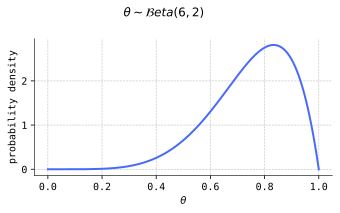

In [9]:
import scipy as sp

Theta = sp.stats.beta(a=6, b=2)
theta = np.linspace(0, 1, 150)

plt.plot(theta, Theta.pdf(theta))
plt.xlabel(r'$\theta$')
plt.ylabel('probability density')
plt.suptitle(r'$\theta \sim \mathcal{B}eta(6,2)$')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

```{margin}

Of course, there are infinitely many distributions on the interval $(0,1)$ with an expected value of $0.75$, so our choice of a $\mathcal{B}eta(6,2)$ distribution is by no means the only one. Choosing these "prior distributions" can be quite difficult in general, and there are many considerations that go into making a good choice. Our choice of a beta distribution is primarily motivated according to [these](https://en.wikipedia.org/wiki/Conjugate_prior) reasons.
```

Notice that this distribution favors values of $\theta$ toward $1$, which is consistent with our friend's untrustworthy track record. Also, if $\theta$ really does come from a $\mathcal{B}eta(6,2)$ random variable, then as we learned back in {prf:ref}`exp-beta-thm`, its expected value is indeed $6/(6+2) = 0.75$. Suppose we write

$$
f(\theta) \propto \theta^5 (1-\theta)
$$

for the density function of $\theta$ drawn from the $\mathcal{B}eta(6,2)$ distribution.

Now, suppose that we flip the coin ten times. It is natural to realize the resulting dataset as an observation from an IID random sample

$$
X_1,X_2,\ldots,X_{10}
$$

with $X_i \sim \mathcal{B}er(\theta)$ for each $i$ and a value $x_i=1$ indicating that a head was obtained on the $i$-th flip. It is also natural to assume that the flips are independent of each other (conditioned on $\theta$). Therefore, the joint mass function of the random sample (conditioned on $\theta$) factors as

$$
p(x_1,x_2,\ldots,x_{10}| \theta) = \prod_{i=1}^{10} p(x_i|\theta) = \prod_{i=1}^{10}\theta^{x_i}(1-\theta)^{1-x_i} = \theta^x (1-\theta)^{10-x},
$$ (factor-likelihood-eqn)

where $x = x_1+x_2+\cdots +x_{10}$ is the total number of heads in the dataset.

```{margin}

Recall from the worksheet in the previous chapter that the new "updated" distribution is often called the _posterior distribution_.
```

We now use Bayes' Theorem to update our prior $\mathcal{B}eta(6,2)$ distribution for $\theta$ to a new distribution with density $f(\theta|x_1,x_2,\ldots,x_{10})$. Assuming that the values $x_1,x_2,\ldots,x_{10}$ are fixed, observed values, here are the computations:

\begin{align*}
f(\theta| x_1,\ldots,x_{10}) &= \frac{p(x_1,\ldots,x_{10}|\theta)f(\theta)}{p(x_1,\ldots,x_{10})} \\
&\propto p(x_1,\ldots,x_{10}|\theta)f(\theta)\\
&= \theta^x(1-\theta)^{10-x} \theta^5 (1-\theta) \\
&= \theta^{(x+6)-1} ( 1-\theta)^{(12-x)-1}.
\end{align*}

Thus, the "updated" distribution must be of the form $\mathcal{B}eta(x+6,12-x)$, where $x$ is the number of heads in the dataset with $0\leq x \leq 10$. Let's plot these eleven distributions:

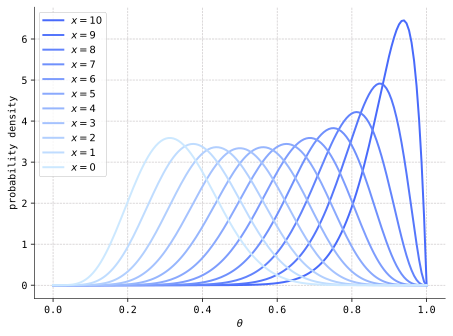

In [10]:
blues = sns.color_palette('blend:#cce8ff,#486afb', n_colors=11)

for x in range(10, -1, -1):
    Theta_posterior = sp.stats.beta(a=x + 6, b=12 - x)
    plt.plot(theta, Theta_posterior.pdf(theta), label=rf'$x={x}$', color=blues.as_hex()[x])

plt.xlabel(r'$\theta$')
plt.ylabel('probability density')
plt.legend()
plt.tight_layout()

Here's what you should notice: For larger values of $x$, the distributions are shifted toward higher values of $\theta$, which reflects the fact that many heads suggests $\theta$ is close to $1$. In the other direction, smaller values of $x$ shift the distributions toward $0$.

In particular, for $x=3$ we obtain an "updated" distribution of $\mathcal{B}eta(9,9)$, which has the symmetric density curve in the figure. The expected value for this distribution is exactly $0.5$, so we would need to see three heads in our dataset to conclude that the coin has a good chance of being fair (at least according to the "posterior mean"). But if we see four or more heads, then our computations still support the conclusion that our friend is untrustworthy since the distributions in this range have expected values $>0.5$. In the other direction, if we see two or fewer heads, then we might believe that the coin favors us.

```{note}

It is worth addressing this point again: Why do we need to see _three_ heads to conclude that the coin might be fair, and not _five_ heads?

Remember, we believe that our friend is untrustworthy. If we believed that $\theta=0.75$, then seeing five heads is not enough evidence to convince us that $\theta$ is, in reality, near $0.5$. We would need to see _even fewer_ heads to overcome (or offset) the prior estimate of $\theta=0.75$.
```

Actually, my description here is slightly at odds with a strict interpretation of Bayesian philosophy, since a true Bayesian would never assume that the parameter $\theta$ has a fixed valued at the outset, only that it has a prior probability distribution.

Notice that independence of the coin flips was _absolutely crucial_ for the computations to go through. Without assuming independence, we would not have been able to factor the joint mass function (conditioned on $\theta$) as in {eq}`factor-likelihood-eqn`, which would have made our application of Bayes' Theorem much more difficult. This joint mass function is actually known as the _likelihood function_ $\mathcal{L}(\theta)$ of the parameter $\theta$, and we will see these same computations appear again when we study [_maximum likelihood estimation_](prob-models) (_MLE_).